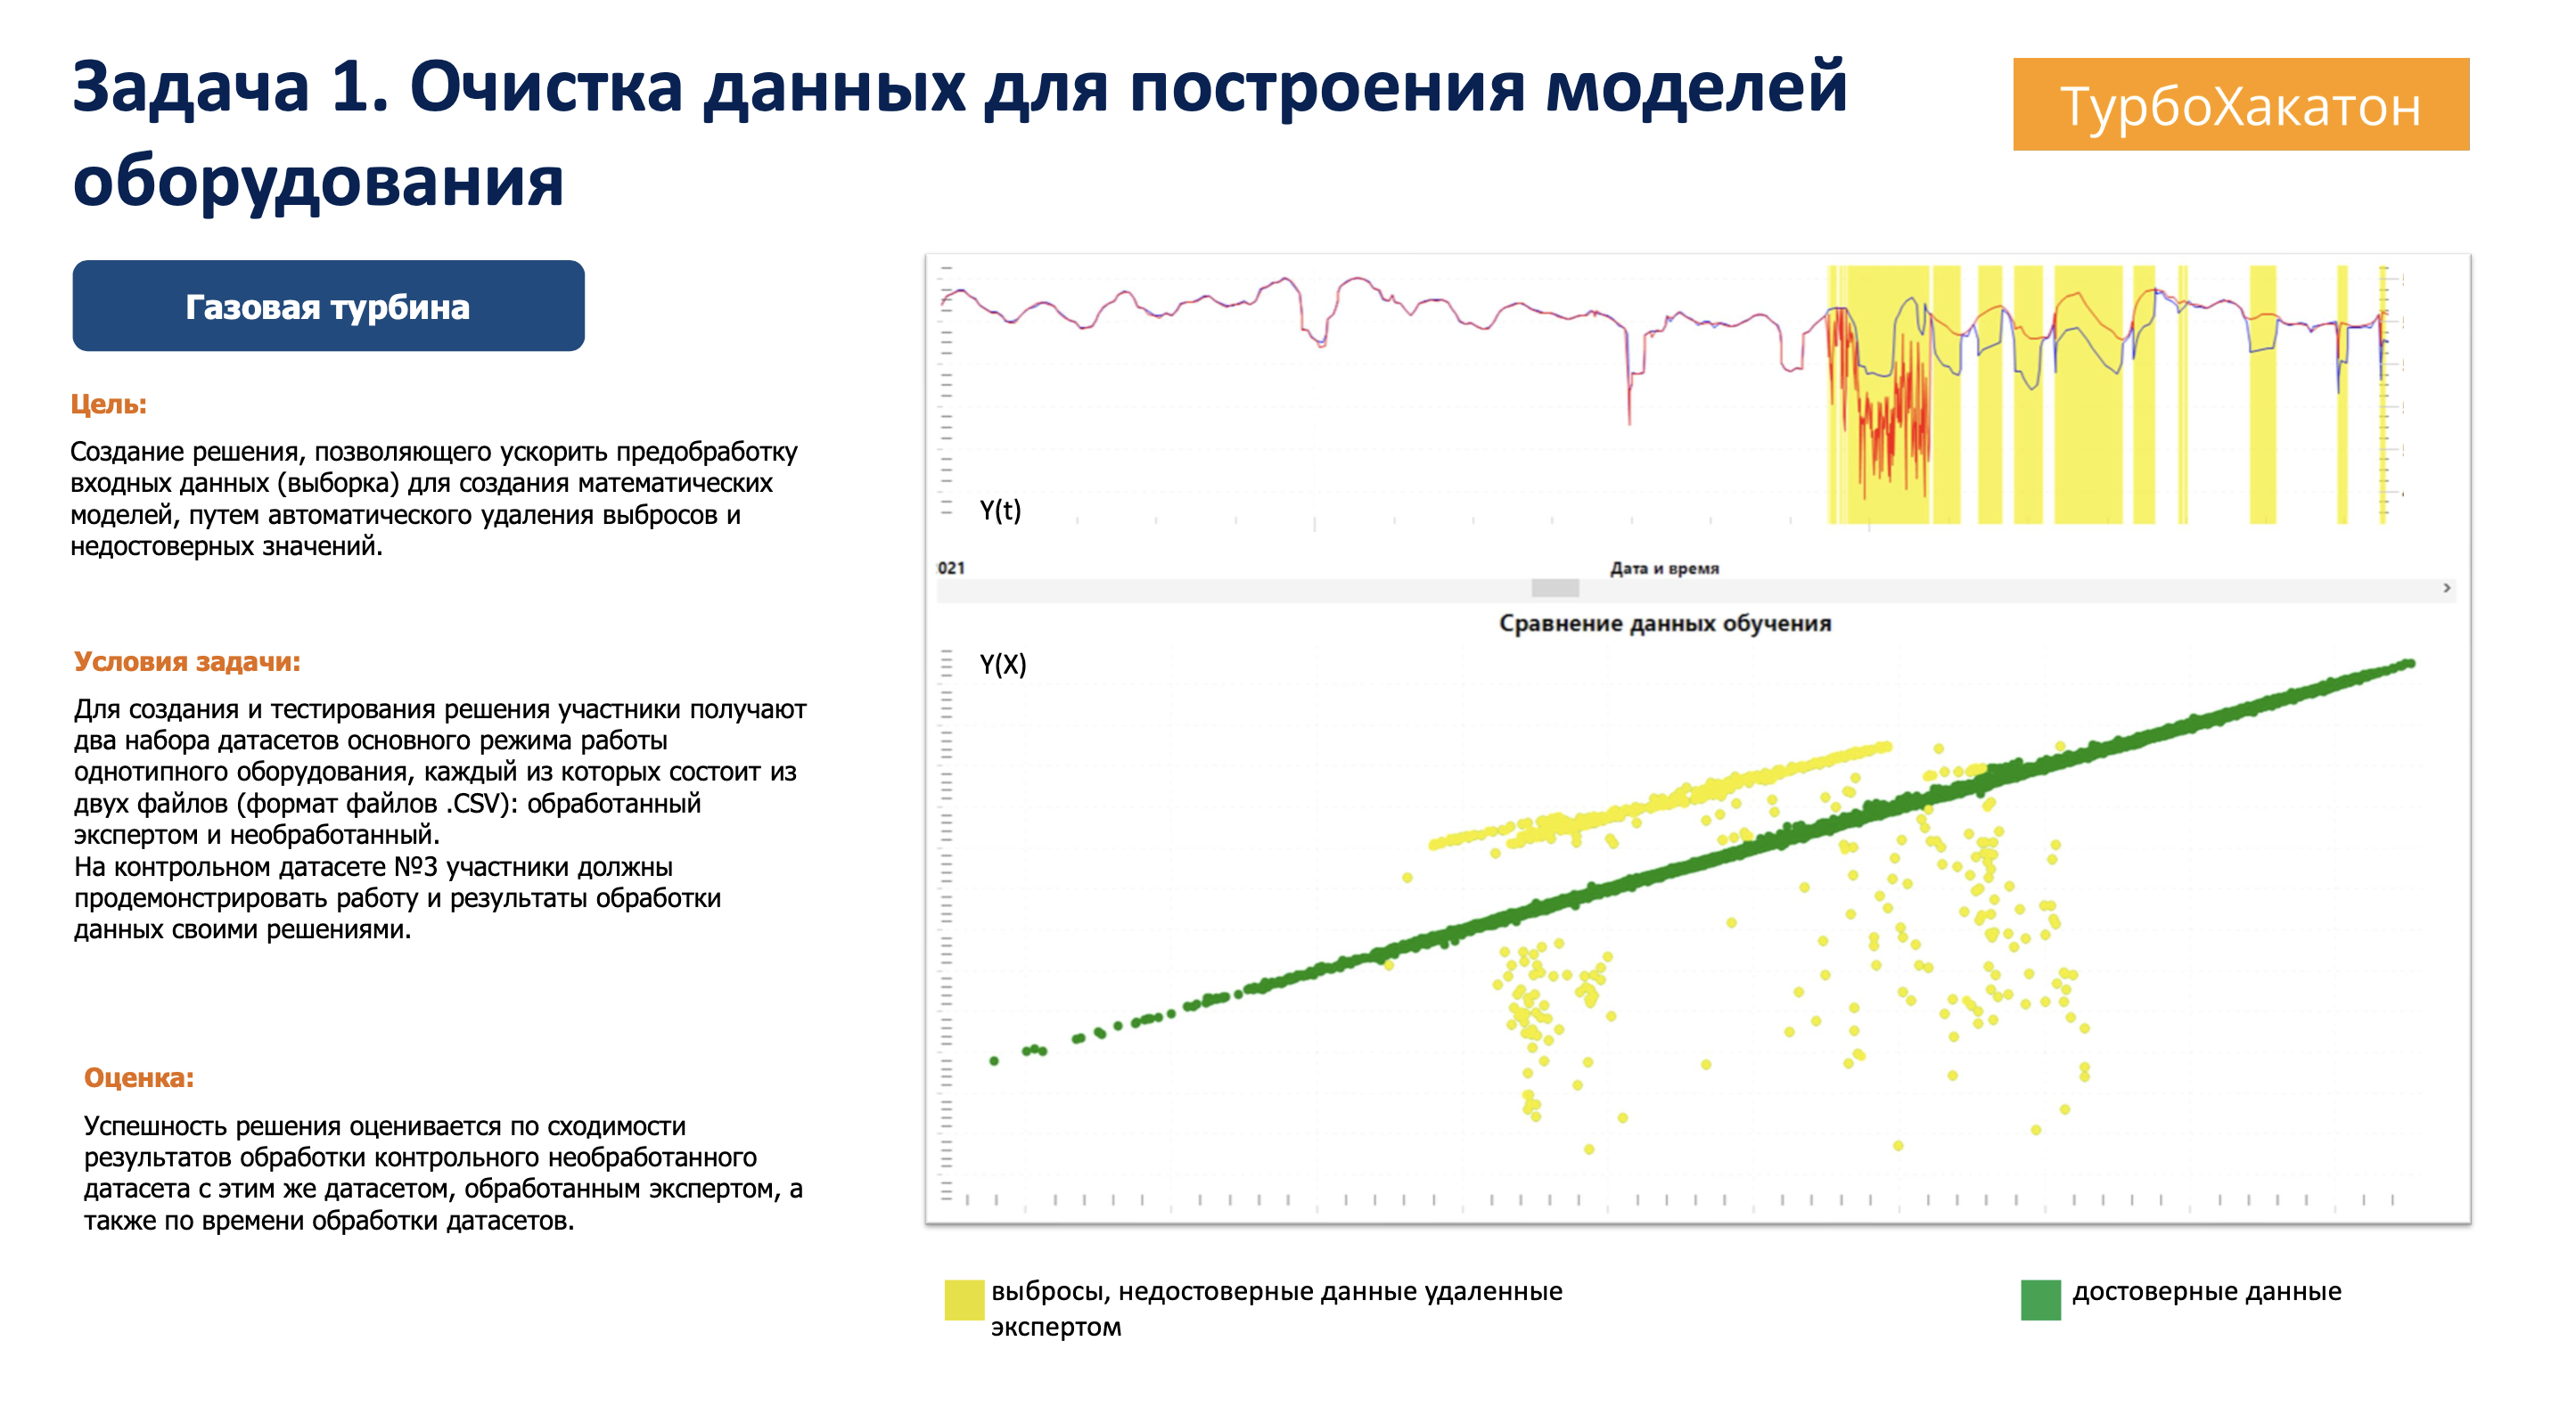

In [48]:
from IPython.display import Image, display

display(Image("pic_task1.png"))


Курс по временным рядам от сбера
https://github.com/korowood/ts_winter/blob/master/week_1/transformations.ipynb


Примеры с каггла
https://www.kaggle.com/code/kellibelcher/time-series-forecasting-arima-ets-boosting

https://www.kaggle.com/code/lonnieqin/tps-22-03-with-lstm-including-moving-average

https://www.kaggle.com/code/packinman/tps-mar-2022-automl-pycaret-regression

1. Понять и выделить метрики по которым сравниваются 2 датасета

        pandas.testing.assert_frame_equal ??

2. Найти методы поиска аномалий на временных рядах

        clustering


3. По каким то фичам значения удалены, а по каким то заменены. Почему? На какое значение? - не заменены

In [7]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

from plotting import plot_ts

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
os.listdir("../task_1")

['.DS_Store',
 'eda_task1.ipynb',
 'plotting.py',
 'Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx',
 '__pycache__',
 'README.md',
 'Задача 1. Датасет 1. Тренировочный размеченный.xlsx']

In [10]:
data_unlabled = pd.read_excel("Задача 1. Датасет 1. Тренировочный неразмеченный.xlsx", index_col='Параметр')
data_labled = pd.read_excel("Задача 1. Датасет 1. Тренировочный размеченный.xlsx", index_col='Параметр')

In [11]:
# plt.figure(figsize=(10, 12))
# sns.lineplot(data=data_unlabled, x="Параметр", y="х001")
# sns.lineplot(data=data_labled, x="Параметр", y="х001")

In [22]:
tmp = data_unlabled['х035']
tmp1 = data_labled['х035']

In [35]:
tmp.loc['2021-06-21 11:00:00'], tmp1.loc['2021-06-21 11:00:00']

(601.04, 601.04)

In [43]:
tmp.loc['2021-06-21 12:10:00'], tmp1.loc['2021-06-21 12:10:00']

(603.61, 603.61)

In [23]:
plot_ts(tmp, tmp1)

Loading BokehJS ...

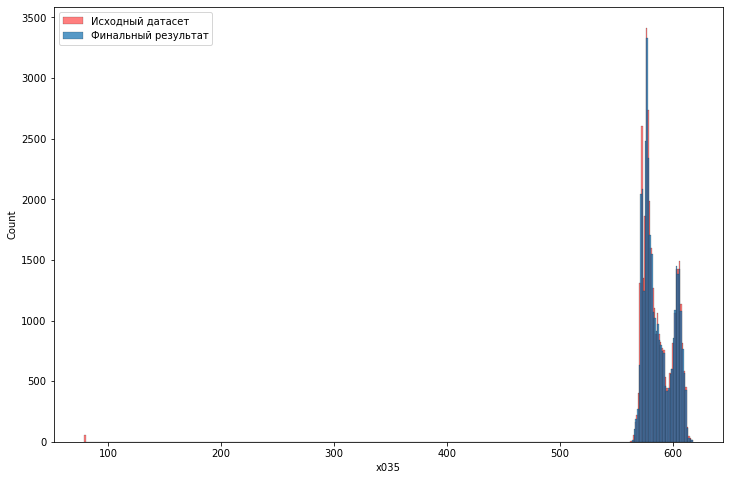

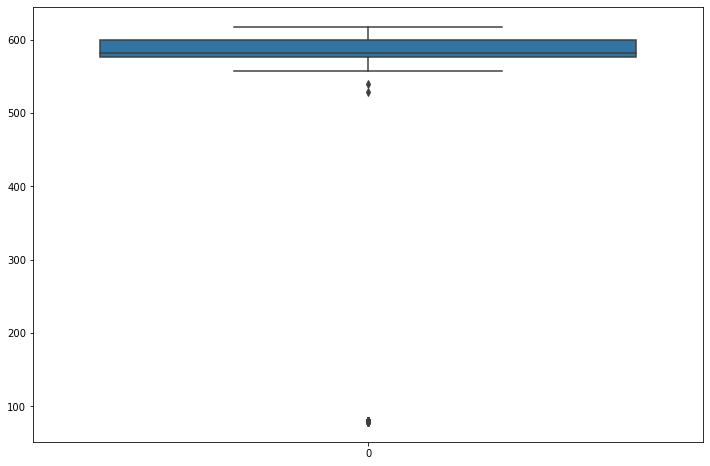

In [31]:

plt.figure(figsize=(12, 8))
sns.histplot(tmp, alpha=0.5, color="red")
sns.histplot(tmp1)
plt.legend(labels=['Исходный датасет', 'Финальный результат']);
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=tmp)
plt.show()

In [110]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import plotly as py
import plotly.io as pio
pio.renderers.default = "vscode"
init_notebook_mode(connected=True)

In [73]:
tmp = data_unlabled[:100]
# pd.pivot(tmp, index=[tmp.columns, tmp.index], columns=tmp.values)

In [77]:
tmp

,х001,х002,х005,х006,х007,х008,х009,х010,х011,х012,...,х039,х040,х041,х042,х043,х044,х045,х046,х047,х048
Параметр,,,,,,,,,,,,,,,,,,,,,
2021-03-24 13:30:00,554.01,546.45,568.66,553.95,550.21,549.53,564.10,564.59,555.75,553.00,...,545.17,534.33,531.89,533.32,564.66,554.75,539.90,537.91,562.42,566.70
2021-03-24 13:40:00,566.22,557.23,583.57,567.53,564.84,560.93,580.80,580.53,570.74,563.59,...,566.10,549.94,547.08,547.60,578.51,572.07,553.96,550.94,571.90,578.61
2021-03-24 13:50:00,577.64,566.55,590.45,576.19,573.11,571.31,590.91,589.67,579.19,569.13,...,577.83,560.46,556.89,555.97,585.74,581.30,561.09,560.34,577.21,577.46
2021-03-24 14:00:00,586.00,572.80,599.18,585.74,580.65,578.99,596.22,597.53,585.06,574.26,...,591.73,569.11,565.92,564.06,589.19,591.20,569.13,568.94,581.37,585.81
2021-03-24 14:10:00,588.59,573.98,600.51,590.21,583.39,582.58,594.09,594.99,586.70,571.53,...,597.62,573.98,569.60,567.60,584.83,595.38,572.04,571.79,583.09,588.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 05:20:00,559.08,563.60,566.78,572.62,579.31,579.46,585.48,584.68,580.52,582.10,...,572.36,568.84,565.86,568.33,572.40,564.70,560.58,561.45,564.90,563.45
2021-03-25 05:30:00,558.68,563.10,566.54,571.94,578.85,579.32,585.15,584.70,580.19,582.10,...,572.11,568.52,565.54,568.25,572.03,564.65,560.33,560.88,564.44,563.00
2021-03-25 05:40:00,558.67,562.87,566.57,572.22,578.81,579.07,585.32,584.90,580.17,582.05,...,572.28,568.57,565.50,568.08,572.10,564.80,560.20,560.98,564.56,562.95


In [92]:
tmp.reset_index(inplace=True)

In [94]:
tmp_ = pd.melt(tmp, id_vars=['Параметр'])

In [112]:
px.line(tmp_,
              x='Параметр',
              y='value',
              animation_frame='variable')
